In [19]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

In [20]:
data = pd.read_csv('Retail_Data_Transactions.csv')

In [21]:
data

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1
1,CS4768,15-Mar-15,39,1
2,CS2122,26-Feb-13,52,0
3,CS1217,16-Nov-11,99,0
4,CS1850,20-Nov-13,78,0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0
124996,CS7232,19-Aug-14,38,0
124997,CS8731,28-Nov-14,42,0
124998,CS8133,14-Dec-13,13,0


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  125000 non-null  object
 1   trans_date   125000 non-null  object
 2   tran_amount  125000 non-null  int64 
 3   response     125000 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 3.8+ MB


In [25]:
def onehot_encode(df, column):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [26]:
def preprocess_inputs(df):
    df = df.copy()

    # Drop customer_id column
    df = df.drop('customer_id', axis=1)


    # Date encoding
    df['trans_date'] = pd.to_datetime(df['trans_date'])
    df['Year_Customer'] = df['trans_date'].apply(lambda x: x.year)
    df['Month_Customer'] = df['trans_date'].apply(lambda x: x.month)
    df['Day_Customer'] = df['trans_date'].apply(lambda x: x.day)
    df = df.drop('trans_date', axis=1)

    # Split df into X and y
    y = df['response']
    X = df.drop('response', axis=1)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

    return X_train, X_test, y_train, y_test

In [27]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [28]:
X_train

,tran_amount,Year_Customer,Month_Customer,Day_Customer
8029,1.136766,-1.528111,0.679634,-0.767524
93605,-1.093311,0.198078,1.541235,1.162366
100291,-1.836670,0.198078,-0.756367,-0.313432
83597,-0.262498,-0.665016,0.966834,0.254183
112603,-0.262498,0.198078,-0.181967,0.708275
...,...,...,...,...
50057,-1.005857,0.198078,-0.756367,0.367706
98047,1.617763,0.198078,1.541235,0.367706
5192,1.180493,1.061172,-1.330768,0.821798
77708,0.349680,-0.665016,0.966834,-0.426955


In [29]:
y_train

8029      0
93605     0
100291    0
83597     0
112603    0
         ..
50057     0
98047     0
5192      0
77708     0
98539     0
Name: response, Length: 87500, dtype: int64

**Training**

In [30]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))
x = tf.keras.layers.Dense(128, activation='relu')(inputs)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
2188/2188 [==============================] - 16s 6ms/step - loss: 0.3495 - accuracy: 0.8895 - auc: 0.5438 - val_loss: 0.3509 - val_accuracy: 0.8869 - val_auc: 0.5570
Epoch 2/100
2188/2188 [==============================] - 6s 3ms/step - loss: 0.3458 - accuracy: 0.8896 - auc: 0.5481 - val_loss: 0.3503 - val_accuracy: 0.8869 - val_auc: 0.5558
Epoch 3/100
2188/2188 [==============================] - 7s 3ms/step - loss: 0.3449 - accuracy: 0.8896 - auc: 0.5548 - val_loss: 0.3514 - val_accuracy: 0.8869 - val_auc: 0.5556
Epoch 4/100
2188/2188 [==============================] - 6s 3ms/step - loss: 0.3447 - accuracy: 0.8896 - auc: 0.5542 - val_loss: 0.3498 - val_accuracy: 0.8869 - val_auc: 0.5563
Epoch 5/100
2188/2188 [==============================] - 6s 3ms/step - loss: 0.3444 - accuracy: 0.8896 - auc: 0.5557 - val_loss: 0.3517 - val_accuracy: 0.8869 - val_auc: 0.5601
Epoch 6/100
2188/2188 [==============================] - 5s 2ms/step - loss: 0.3442 - accuracy: 0.8896 - auc: 0.55

In [31]:
results = model.evaluate(X_test, y_test, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))
print("     Test AUC: {:.5f}".format(results[2]))

    Test Loss: 0.34303
Test Accuracy: 88.97%
     Test AUC: 0.56743


1172/1172 [==============================] - 5s 4ms/step


<ipython-input-32-cc481e15c268>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred = np.array(model.predict(X_test) >= 0.5, dtype=np.int)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricW

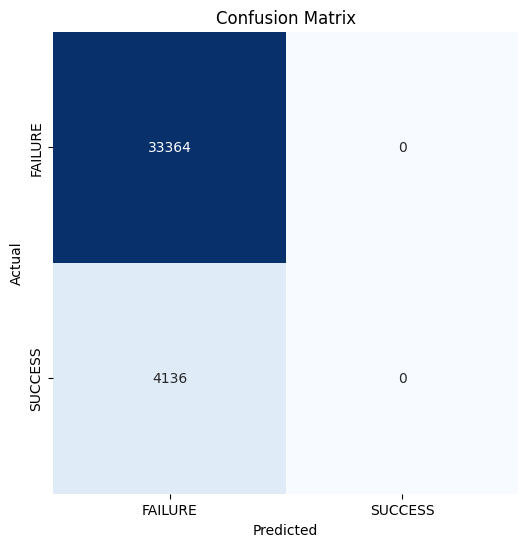

Classification Report:
----------------------
               precision    recall  f1-score   support

     FAILURE       0.89      1.00      0.94     33364
     SUCCESS       0.00      0.00      0.00      4136

    accuracy                           0.89     37500
   macro avg       0.44      0.50      0.47     37500
weighted avg       0.79      0.89      0.84     37500



In [32]:
y_pred = np.array(model.predict(X_test) >= 0.5, dtype=np.int)

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names=["FAILURE", "SUCCESS"])

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(2) + 0.5, labels=["FAILURE", "SUCCESS"])
plt.yticks(ticks=np.arange(2) + 0.5, labels=["FAILURE", "SUCCESS"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)